In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# You can read the data into a pandas DataFrame
data = pd.read_csv('daily-website-visitors.csv')


In [32]:
# Display the first few rows of the dataset to verify the import
print(data.head())

   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236  


In [33]:
# Basic statistics and info about the dataset
print(data.describe())

               Row  Day.Of.Week
count  2167.000000  2167.000000
mean   1084.000000     3.997231
std     625.703338     2.000229
min       1.000000     1.000000
25%     542.500000     2.000000
50%    1084.000000     4.000000
75%    1625.500000     6.000000
max    2167.000000     7.000000


In [34]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB
None


In [35]:
data.isna().sum()

Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

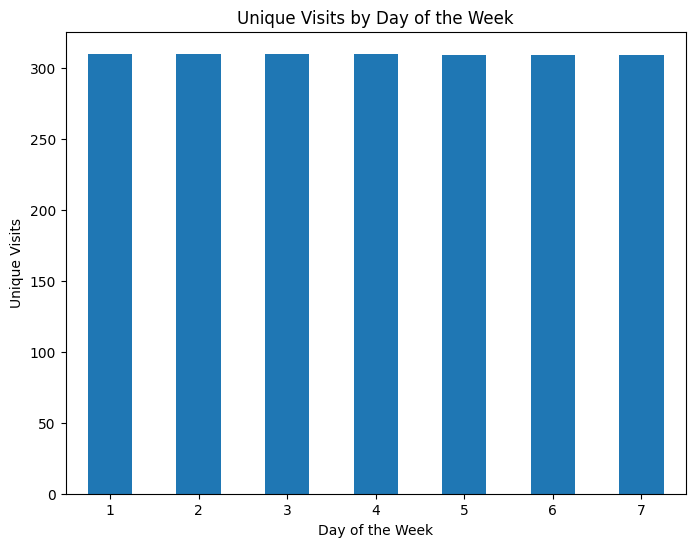

In [28]:
# Example 1: Bar chart for Day of the Week and Unique Visits
day_of_week_counts = data['Day.Of.Week'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
day_of_week_counts.plot(kind='bar')
plt.title('Unique Visits by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Unique Visits')
plt.xticks(rotation=0)
plt.show()


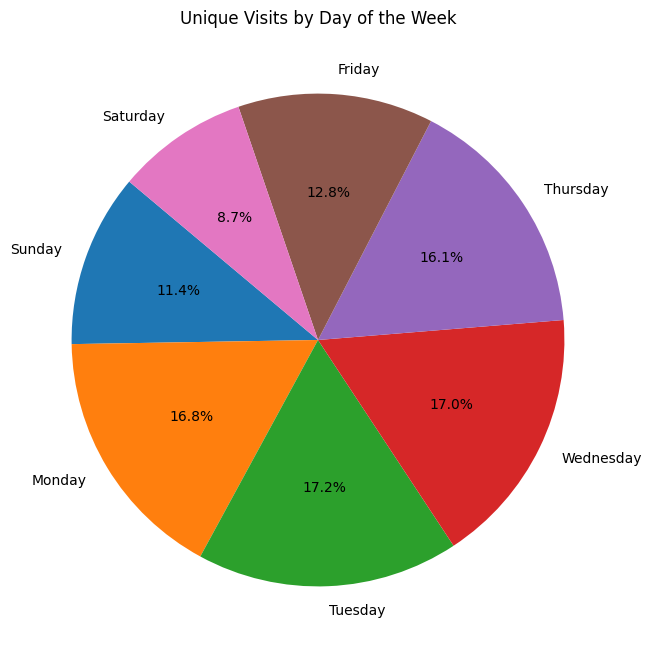

In [41]:
# Example 2: Pie chart for Unique Visits by Day of the Week
unique_visits_by_day = data.groupby('Day.Of.Week')['Unique.Visits'].sum()
day_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(8, 8))
plt.pie(unique_visits_by_day, labels=day_labels, autopct='%1.1f%%', startangle=140)
plt.title('Unique Visits by Day of the Week')

plt.show()

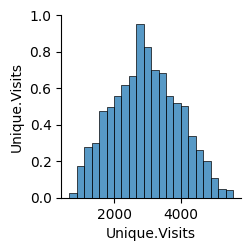

In [42]:
# Example 3: Creating a pairplot for numeric columns
columns_to_plot = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']

# Check that the specified columns exist in your dataset
if all(col in data.columns for col in columns_to_plot):
    sns.pairplot(data[columns_to_plot])
    plt.show()
else:
    print("One or more specified columns do not exist in the dataset.")

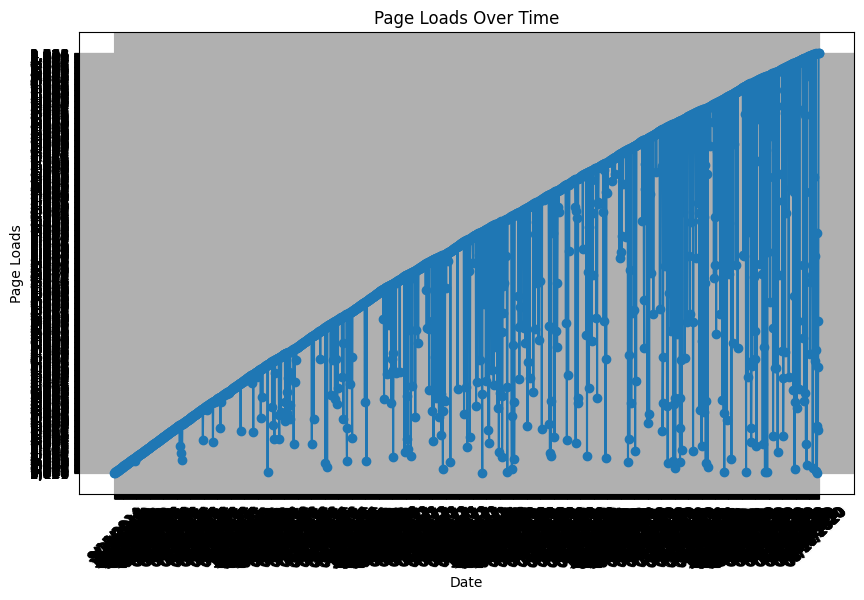

In [46]:
# Example 4: Line chart for Page Loads over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Page.Loads'], marker='o', linestyle='-')
plt.title('Page Loads Over Time')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


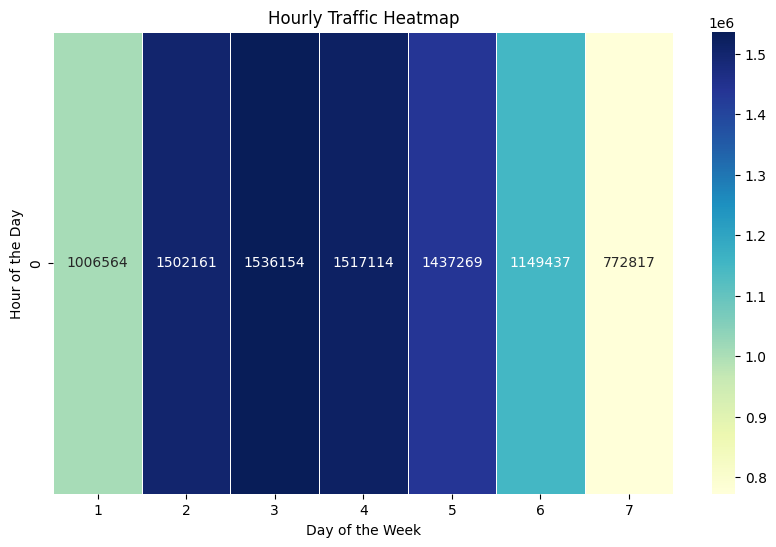

In [56]:
# Example 5: Heatmap
import seaborn as sns

# Assuming you have a CSV file with the following columns: Row, Day, Day.Of.Week, Date, Page.Loads, Unique.Visits, First.Time.Visits, Returning.Visits
# You can read the data into a pandas DataFrame
data = pd.read_csv('daily-website-visitors.csv')

# Remove commas from 'Page.Loads' and convert it to a numeric format
data['Page.Loads'] = data['Page.Loads'].str.replace(',', '').astype(int)

# Extract the hour from the 'Date' column
data['Hour'] = pd.to_datetime(data['Date']).dt.hour

# Create a pivot table to prepare the data for the heatmap
traffic_pivot = data.pivot_table(index='Hour', columns='Day.Of.Week', values='Page.Loads', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(traffic_pivot, cmap='YlGnBu', linewidths=.5, annot=True, fmt='d')
plt.title('Hourly Traffic Heatmap')
plt.xlabel('Day of the Week')

plt.ylabel('Hour of the Day')
plt.show()


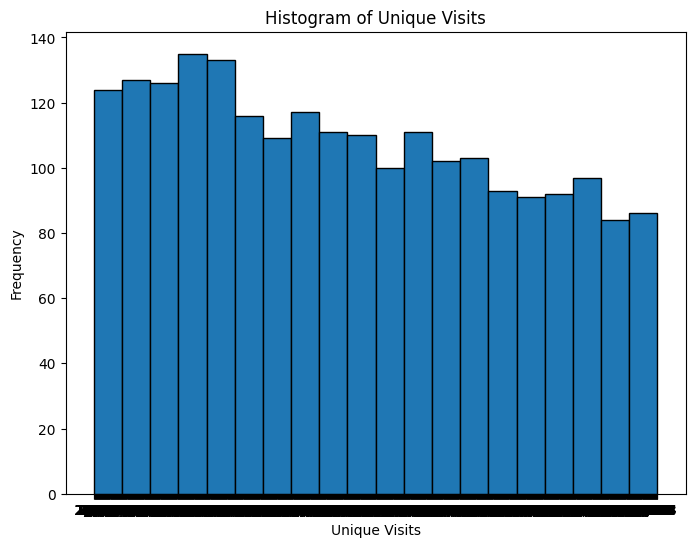

In [59]:
# Example 6:Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Unique.Visits'], bins=20, edgecolor='k')
plt.title('Histogram of Unique Visits')
plt.xlabel('Unique Visits')
plt.ylabel('Frequency')
plt.show()
